# Análisis y visualización de datos con Python
# 9. Data Wrangling

    - a) División-aplicación-combinación
    - b) Agrupar
    - c) Agregar
    - d) Transformar
    - e) Filtrar
    - f) Ventanas
    - g) Resumen
    
--- 

Empezaremos cargando los datos en formato `pickle` para asegurarnos que los tipos de datos se respeten.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import load

in_file = "data_clean/HBO_clean.pkl"
with open(in_file, 'rb') as f:
     df = load(f)
df.tail()


,ID,Nombre_completo_transcrito,Primer_apellido,Segundo_apellido,Nombres_propios,Fecha_transcrito,Fecha_estandar,Fecha_año,Fecha_mes,Fecha_diasemana,...,Diagnostico_transcrito,Diagnostico_estandar,Diagnostico_extendido,Diagnostico_clasificacion,Sexo,Edad_transcrito,Edad_estandar,Edad_grupo,Tipo_restos,Conocido_desconocido
96839,BO_1982_07489,placenta,NaN,NaN,NaN,1982-06-05,1982-06-05,1982.0,6.0,Sábado,...,S-D,NaN,NaN,NaN,S-D,S-D,NaN,NaN,Miembros u óseos,Desconocido
96840,BO_1982_07490,5 dedos del pie derecho de desconocido,NaN,NaN,NaN,1982-06-05,1982-06-05,1982.0,6.0,Sábado,...,S-D,NaN,NaN,NaN,S-D,S-D,NaN,NaN,Miembros u óseos,Desconocido
96841,BO_1982_07491,dedo de desconocido,NaN,NaN,NaN,1982-11-19,1982-11-19,1982.0,11.0,Viernes,...,S-D,NaN,NaN,NaN,S-D,S-D,NaN,NaN,Miembros u óseos,Desconocido
96842,BO_1982_07492,4 dedos de desconocido,NaN,NaN,NaN,1982-11-28,1982-11-28,1982.0,11.0,Domingo,...,S-D,NaN,NaN,NaN,S-D,S-D,NaN,NaN,Miembros u óseos,Desconocido
96843,BO_1982_07493,osamenta de desconocido,NaN,NaN,NaN,1982-10-11,1982-10-11,1982.0,10.0,Lunes,...,S-D,NaN,NaN,NaN,S-D,S-D,NaN,NaN,Cadáver,Desconocido


## 9.a División-aplicación-combinación

El pipeline [split-apply-combine](https://pandas.pydata.org/docs/user_guide/groupby.html) es un enfoque muy común en el análisis de datos y se refiere a un proceso de tres pasos:
* _Split_ (divide): El conjunto de datos original se divide en grupos basados en una o más columnas. En primer lugar, se divide el conjunto de datos en grupos basados en una o varias columnas utilizando la función `groupby()`. Esto genera un objeto `GroupBy` que contiene los grupos y se puede aplicar una función o transformación a cada grupo por separado.
* _Apply_ (aplicación): Se aplica alguna función o transformación a cada grupo por separado. Luego, se aplica alguna función o transformación a cada grupo por separado. Esta función puede ser de varios tipos:
    * _Aggregate_ (agregar): calcular una estadística de resumen (o varias estadísticas) para cada grupo. Por ejemplo, calcular la suma o tamaño de los grupos.
    * _Transform_ (transformar): realizar algunos cálculos específicos del grupo y devolver un objeto con el mismo índice.  Por ejemplo, rellenar los valores faltantes (`nan`) dentro de un grupo con un valor derivado de ese mismo grupo.
    * _Filter_ (filtrar): descartar algunos grupos, según un cálculo por grupo que evalúa Verdadero o Falso. Por ejemplo, descartar datos que pertenecen a grupos con muy pocos miembros.
    * Una combinación de lo anterior
* _Combine_ (combinar): Los resultados de cada grupo se combinan en un único DataFrame utilizando la función `concat()`, `merge()` u otra función de combinación de pandas.

A continuación veremos una introducción a este pipeline, aunque se recomienda ver la documentación de [split-apply-combine](https://pandas.pydata.org/docs/user_guide/groupby.html).

## 9.b Agrupar por características

La función `groupby()` se utiliza para agrupar datos en función de una o varias columnas y aplicar una función de agregación a cada grupo.
Esta función divide la tabla o DataFrame en sub-tablas o grupos de acuerdo a los valores de una o más columnas. El resultado es un objeto similar a un diccionario, donde las llaves son los valores por los que se dividió la tabla y los valores las sub-tablas resultantes. Este objeto es iterable y se le pueden aplicar funciones por separado a cada grupo.


In [2]:
groups = df.groupby('Sexo', observed=True)

for key, data in groups:
    print(f"Grupo:{key}, \tTamaño:{data.shape} \tType':{type(data)}")

Grupo:Femenino, 	Tamaño:(20601, 24) 	Type':<class 'pandas.core.frame.DataFrame'>
Grupo:Masculino, 	Tamaño:(73741, 24) 	Type':<class 'pandas.core.frame.DataFrame'>
Grupo:S-D, 	Tamaño:(2502, 24) 	Type':<class 'pandas.core.frame.DataFrame'>


Usando varias columnas para agrupar se genera un `multiindex`.

Esto crea una agrupación jerárquica que considera las combinaciones posibles entre "Sexo" y "Tipo_restos".

In [3]:
groups = df.groupby(['Sexo','Tipo_restos'])

for key, data in groups:
    print(f"Grupo:{key}, \tTamaño:{data.shape} \tType':{type(data)}")

Grupo:('Femenino', 'Cadáver'), 	Tamaño:(19503, 24) 	Type':<class 'pandas.core.frame.DataFrame'>
Grupo:('Femenino', 'Feto'), 	Tamaño:(462, 24) 	Type':<class 'pandas.core.frame.DataFrame'>
Grupo:('Femenino', 'Recién nacido'), 	Tamaño:(251, 24) 	Type':<class 'pandas.core.frame.DataFrame'>
Grupo:('Femenino', 'Miembros u óseos'), 	Tamaño:(385, 24) 	Type':<class 'pandas.core.frame.DataFrame'>
Grupo:('Masculino', 'Cadáver'), 	Tamaño:(71182, 24) 	Type':<class 'pandas.core.frame.DataFrame'>
Grupo:('Masculino', 'Feto'), 	Tamaño:(662, 24) 	Type':<class 'pandas.core.frame.DataFrame'>
Grupo:('Masculino', 'Recién nacido'), 	Tamaño:(379, 24) 	Type':<class 'pandas.core.frame.DataFrame'>
Grupo:('Masculino', 'Miembros u óseos'), 	Tamaño:(1518, 24) 	Type':<class 'pandas.core.frame.DataFrame'>
Grupo:('S-D', 'Cadáver'), 	Tamaño:(569, 24) 	Type':<class 'pandas.core.frame.DataFrame'>
Grupo:('S-D', 'Feto'), 	Tamaño:(1720, 24) 	Type':<class 'pandas.core.frame.DataFrame'>
Grupo:('S-D', 'Recién nacido'), 	Tamaño

/tmp/ipykernel_46320/1773239427.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df.groupby(['Sexo','Tipo_restos'])


Para incluir los `nan` en los grupos se usa la opción `dropna=False`

In [4]:
groups = df.groupby('Fecha_año', observed=False, dropna=False)

for key, data in groups:
    print(f"Grupo:{key}, \tTamaño:{data.shape} \tType':{type(data)}")

Grupo:1968.0, 	Tamaño:(4716, 24) 	Type':<class 'pandas.core.frame.DataFrame'>
Grupo:1969.0, 	Tamaño:(5045, 24) 	Type':<class 'pandas.core.frame.DataFrame'>
Grupo:1970.0, 	Tamaño:(5282, 24) 	Type':<class 'pandas.core.frame.DataFrame'>
Grupo:1971.0, 	Tamaño:(5503, 24) 	Type':<class 'pandas.core.frame.DataFrame'>
Grupo:1972.0, 	Tamaño:(5754, 24) 	Type':<class 'pandas.core.frame.DataFrame'>
Grupo:1973.0, 	Tamaño:(6214, 24) 	Type':<class 'pandas.core.frame.DataFrame'>
Grupo:1974.0, 	Tamaño:(5947, 24) 	Type':<class 'pandas.core.frame.DataFrame'>
Grupo:1975.0, 	Tamaño:(6854, 24) 	Type':<class 'pandas.core.frame.DataFrame'>
Grupo:1976.0, 	Tamaño:(6892, 24) 	Type':<class 'pandas.core.frame.DataFrame'>
Grupo:1977.0, 	Tamaño:(7132, 24) 	Type':<class 'pandas.core.frame.DataFrame'>
Grupo:1978.0, 	Tamaño:(7112, 24) 	Type':<class 'pandas.core.frame.DataFrame'>
Grupo:1979.0, 	Tamaño:(7428, 24) 	Type':<class 'pandas.core.frame.DataFrame'>
Grupo:1980.0, 	Tamaño:(7604, 24) 	Type':<class 'pandas.core.fram

## 9.c Agregar

Las funciones de agregación son funciones en Pandas que se utilizan en conjunto con la función `groupby()` para realizar cálculos resumidos sobre un conjunto de datos agrupados. Estas funciones toman un conjunto de valores y los resumen en un solo valor. 

Algunas de las funciones de agregación más comunes son:
* `mean()`: promedio
* `sum()`: suma de valores
* `size()`: tamaño del grupo incluyendo `nan`
* `count()`: conteo del grupo sin `nan`
* `std()`: desviación estándar
* `var()`: varianza
* `describe()`: estadísticas descriptivas
* `first()`: primer valor
* `last()`: último valor
* `nth()`: n-esimo valor
* `min()`: valor minino
* `max()`: valor máximo


In [5]:
df.groupby(by=['Sexo','Tipo_restos']).size()

/tmp/ipykernel_46320/1230705162.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by=['Sexo','Tipo_restos']).size()


Sexo       Tipo_restos     
Femenino   Cadáver             19503
           Feto                  462
           Recién nacido         251
           Miembros u óseos      385
Masculino  Cadáver             71182
           Feto                  662
           Recién nacido         379
           Miembros u óseos     1518
S-D        Cadáver               569
           Feto                 1720
           Recién nacido           3
           Miembros u óseos      210
dtype: int64

In [6]:
df.groupby(by=['Sexo','Tipo_restos']).count()

/tmp/ipykernel_46320/3784764527.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by=['Sexo','Tipo_restos']).count()


ID  Nombre_completo_transcrito  \
Sexo      Tipo_restos                                           
Femenino  Cadáver           19503                       19503   
          Feto                462                         462   
          Recién nacido       251                         251   
          Miembros u óseos    385                         385   
Masculino Cadáver           71182                       71182   
          Feto                662                         662   
          Recién nacido       379                         379   
          Miembros u óseos   1518                        1518   
S-D       Cadáver             569                         569   
          Feto               1720                        1720   
          Recién nacido         3                           3   
          Miembros u óseos    210                         210   

                            Primer_apellido  Segundo_apellido  \
Sexo      Tipo_restos                                           
Femenino  Cadáver                     17944             17050   
          Feto                            6                 3   
          Recién nacido                   8                 7   
          Miembros u óseos              365                47   
Masculino Cadáver                     58392             57127   
          Feto                            9                 7   
          Recién nacido                  26                21   
          Miembros u óseos             1432               182   
S-D       Cadáver                       522               469   
          Feto                           16                10   
          Recién nacido                   0                 0   
          Miembros u óseos               17                 6   

                            Nombres_propios  Fecha_transcrito  Fecha_estandar  \
Sexo      Tipo_restos                                                           
Femenino  Cadáver                     17927             19503           19454   
          Feto                           63               462             462   
          Recién nacido                  27               251             251   
          Miembros u óseos              376               385             380   
Masculino Cadáver                     58359             71182           71052   
          Feto                          105               662             661   
          Recién nacido                  21               379             378   
          Miembros u óseos             1471              1518            1512   
S-D       Cadáver                       325               569             505   
          Feto                           21              1720            1716   
          Recién nacido                   0                 3               3   
          Miembros u óseos               11               210             205   

                            Fecha_año  Fecha_mes  Fecha_diasemana  ...  \
Sexo      Tipo_restos                                              ...   
Femenino  Cadáver               19454      19454            19454  ...   
          Feto                    462        462              462  ...   
          Recién nacido           251        251              251  ...   
          Miembros u óseos        380        380              380  ...   
Masculino Cadáver               71052      71052            71052  ...   
          Feto                    661        661              661  ...   
          Recién nacido           378        378              378  ...   
          Miembros u óseos       1512       1512             1512  ...   
S-D       Cadáver                 505        505              505  ...   
          Feto                   1716       1716             1716  ...   
          Recién nacido             3          3                3  ...   
          Miembros u óseos        205        205              205  ...   

                            Procedenc

Por ejemplo, agrupemos los datos por sexo y tipo de restos y calculemos el promedio de edad. 

**Nota**: es buena práctica solo seleccionar las columnas sobre las que se va a realizar la operación de agregación

In [7]:
df[['Sexo','Tipo_restos','Edad_estandar']].groupby(by=['Sexo','Tipo_restos']).mean()

/tmp/ipykernel_46320/1355923163.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['Sexo','Tipo_restos','Edad_estandar']].groupby(by=['Sexo','Tipo_restos']).mean()


Edad_estandar
Sexo      Tipo_restos                    
Femenino  Cadáver               36.288619
          Feto                   0.000000
          Recién nacido          0.000000
          Miembros u óseos      40.833333
Masculino Cadáver               36.545541
          Feto                   0.000000
          Recién nacido          0.000000
          Miembros u óseos      34.023077
S-D       Cadáver               29.375000
          Feto                   0.000000
          Recién nacido          0.000000
          Miembros u óseos            NaN

La función `.aggregate()` o `.agg()` se utiliza para aplicar una o varias funciones de agregación a un DataFrame. Esta función es muy útil cuando queremos aplicar diferentes funciones de agregación a diferentes columnas de un DataFrame o cuando queremos aplicar funciones de agregación personalizadas.

Por ejemplo, calculemos varias estadísticas de la edad para cada tipo de restos.

Otra opción para renombrar columnas res el comando `.rename()`.

In [8]:
df[['Tipo_restos','Edad_estandar']].groupby(by='Tipo_restos')['Edad_estandar'] \
                        .agg(['min', 'max', 'mean', 'median', 'std'])

/tmp/ipykernel_46320/1156358941.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['Tipo_restos','Edad_estandar']].groupby(by='Tipo_restos')['Edad_estandar'] \


,min,max,mean,median,std
Tipo_restos,,,,,
Cadáver,0.0,99.0,36.487064,35.0,21.448129
Feto,0.0,0.0,0.000000,0.0,0.000000
Recién nacido,0.0,0.0,0.000000,0.0,0.000000
Miembros u óseos,0.0,91.0,35.500000,30.0,19.753848


También se pueden aplicar distintas funciones a cada columna usando el siguiente formato.

      ```
        .agg
            (
                result_col1=(target_col1, function1),
                result_col2=(target_col2, function2),
                result_col3=(target_col2, function2),
            )
        ```

También es posible usar funciones definidas en `pandas` u otras bibliotecas.

In [9]:
df.groupby('Fecha_año').agg(
    Edad_min = ('Edad_estandar','min'),
    Edad_mediana = ('Edad_estandar','median'),
    Edad_max = ('Edad_estandar','max'),
    Procedencia_moda = ('Procedencia_estandar', pd.Series.mode )
    )

/tmp/ipykernel_46320/2856326766.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Fecha_año').agg(


,Edad_min,Edad_mediana,Edad_max,Procedencia_moda
Fecha_año,,,,
1968.0,NaN,NaN,NaN,"['GAM-2', 'HB'] Categories (130, object): ['AO..."
1969.0,NaN,NaN,NaN,GAM-2
1970.0,NaN,NaN,NaN,GAM-2
1971.0,0.0,0.0,0.0,GAM-2
1972.0,NaN,NaN,NaN,GAM-2
1973.0,0.0,0.0,53.0,GAM-2
1974.0,0.0,34.0,98.0,HB
1975.0,0.0,34.0,98.0,HB
1976.0,0.0,34.0,99.0,CR


Las funciones de agregación también se pueden utilizar, solas o en conjunto con la función `.apply()`, para aplicar funciones personalizadas a los datos agrupados.

Por ejemplo, definamos la función `textos_frecuentes_en_serie` y apliquemos a varias columnas.

In [10]:
def textos_frecuentes_en_serie(series, n_max=5, sep=', ', freq=True):
    textos = series.value_counts().head(n_max)
    if freq:
        textos = [f"{k} ({v})" for k,v in textos.items() if v>0]
    else: textos = textos[textos>0].index
    textos = sep.join(textos)
    return textos

df[['Diagnostico_estandar', 'Procedencia_estandar','Fecha_año']] \
  .groupby(by='Fecha_año') \
  .agg(textos_frecuentes_en_serie) 

/tmp/ipykernel_46320/3830296717.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(by='Fecha_año') \


,Diagnostico_estandar,Procedencia_estandar
Fecha_año,,
1968.0,,"GAM-2 (118), HB (118), VC-1 (95), CUH-1 (74), ..."
1969.0,,"GAM-2 (133), HB (119), VC-1 (89), CUH-6 (72), ..."
1970.0,,"GAM-2 (117), HB (99), CUH-1 (97), VC-1 (97), I..."
1971.0,,"GAM-2 (130), VC-1 (116), HB (98), IZP-1 (86), ..."
1972.0,,"GAM-2 (147), VC-1 (116), HB (90), IZP-1 (86), ..."
1973.0,TCE (1),"GAM-2 (172), VC-1 (150), CUH-1 (121), HB (111)..."
1974.0,"TM (845), TCE (736), BN (229), TCT (208), CVG ...","HB (558), CR (512), GAM-2 (452), HCMS21 (389),..."
1975.0,"TM (1138), TCE (975), BN (255), TCT (227), CVG...","HB (563), CR (525), CUH-1 (433), CMN20N (413),..."
1976.0,"TM (1358), TCE (1029), BN (323), HPAF (251), T...","CR (493), HB (451), CUH-1 (447), HV (429), HX ..."


En caso usar funciones con argumentos es necesario usar una función `lambda`.

In [11]:
df[['Diagnostico_estandar', 'Procedencia_estandar','Fecha_año']] \
  .groupby(by='Fecha_año') \
  .agg(lambda s: textos_frecuentes_en_serie(s, n_max=3, freq=False) ) 

/tmp/ipykernel_46320/226794055.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(by='Fecha_año') \


,Diagnostico_estandar,Procedencia_estandar
Fecha_año,,
1968.0,,"GAM-2, HB, VC-1"
1969.0,,"GAM-2, HB, VC-1"
1970.0,,"GAM-2, HB, CUH-1"
1971.0,,"GAM-2, VC-1, HB"
1972.0,,"GAM-2, VC-1, HB"
1973.0,TCE,"GAM-2, VC-1, CUH-1"
1974.0,"TM, TCE, BN","HB, CR, GAM-2"
1975.0,"TM, TCE, BN","HB, CR, CUH-1"
1976.0,"TM, TCE, BN","CR, HB, CUH-1"


## 9.d Transformar

Las funciones de transformación permiten modificar los datos dentro de un grupo sin cambiar su estructura general. 
A diferencia de las funciones de agregación, que reducen los datos a un solo valor por grupo, las funciones de 
transformación devuelven un objeto con la misma forma que los datos de entrada.

Algunas funciones útiles de transformación en Pandas incluyen:

- `cumsum()`: Calcula la suma acumulativa de una columna.
- `diff()`: Calcula la diferencia entre valores consecutivos en una columna.
- `ffill()`: Rellena valores faltantes con el último valor disponible (forward fill).
- `bfill()`: Rellena valores faltantes con el siguiente valor disponible (backward fill).


In [12]:
df_año_sexo = df[['Fecha_año','Sexo']].value_counts().sort_index()
df_año_sexo

Fecha_año  Sexo     
1968.0     Femenino      904
           Masculino    3482
           S-D           330
1969.0     Femenino      950
           Masculino    3856
           S-D           239
1970.0     Femenino     1023
           Masculino    4025
           S-D           234
1971.0     Femenino     1158
           Masculino    4046
           S-D           299
1972.0     Femenino     1192
           Masculino    4252
           S-D           310
1973.0     Femenino     1296
           Masculino    4550
           S-D           368
1974.0     Femenino     1338
           Masculino    4586
           S-D            23
1975.0     Femenino     1613
           Masculino    5208
           S-D            33
1976.0     Femenino     1592
           Masculino    5282
           S-D            18
1977.0     Femenino     1621
           Masculino    5487
           S-D            24
1978.0     Femenino     1682
           Masculino    5405
           S-D            25
1979.0     Femenino   

In [13]:
df_año_sexo.groupby('Sexo').diff()

/tmp/ipykernel_46320/3898918188.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_año_sexo.groupby('Sexo').diff()


Fecha_año  Sexo     
1968.0     Femenino       NaN
           Masculino      NaN
           S-D            NaN
1969.0     Femenino      46.0
           Masculino    374.0
           S-D          -91.0
1970.0     Femenino      73.0
           Masculino    169.0
           S-D           -5.0
1971.0     Femenino     135.0
           Masculino     21.0
           S-D           65.0
1972.0     Femenino      34.0
           Masculino    206.0
           S-D           11.0
1973.0     Femenino     104.0
           Masculino    298.0
           S-D           58.0
1974.0     Femenino      42.0
           Masculino     36.0
           S-D         -345.0
1975.0     Femenino     275.0
           Masculino    622.0
           S-D           10.0
1976.0     Femenino     -21.0
           Masculino     74.0
           S-D          -15.0
1977.0     Femenino      29.0
           Masculino    205.0
           S-D            6.0
1978.0     Femenino      61.0
           Masculino    -82.0
           S-D     

## 9.e Filtrar

El filtrado en Pandas permite seleccionar subconjuntos de datos que cumplen ciertas condiciones. 
Se puede hacer a nivel de DataFrame o dentro de un `groupby` para excluir grupos específicos.

Algunas técnicas de filtrado incluyen:

- Filtrar filas con base en una condición lógica (`df[df['columna'] > valor]`).
- Filtrar grupos que cumplen con un criterio usando `.filter()` dentro de `groupby()`.

In [14]:
df[['Fecha_año','Diagnostico_estandar']].dropna()

,Fecha_año,Diagnostico_estandar
32837,1974.0,TCT
32839,1974.0,BN+TMi
32840,1974.0,BN+CH
32841,1974.0,BN
32842,1974.0,HPAFCT
...,...,...
74096,1979.0,AQXT
74097,1979.0,AQXT
74098,1979.0,AQXT
74100,1979.0,AT


In [15]:
df[['Fecha_año','Diagnostico_estandar']].groupby(['Fecha_año','Diagnostico_estandar']) \
        .filter(lambda x: len(x) > 10)

/tmp/ipykernel_46320/930463561.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['Fecha_año','Diagnostico_estandar']].groupby(['Fecha_año','Diagnostico_estandar']) \


,Fecha_año,Diagnostico_estandar
32837,1974.0,TCT
32839,1974.0,BN+TMi
32840,1974.0,BN+CH
32841,1974.0,BN
32843,1974.0,PN
...,...,...
74095,1979.0,AQXT
74096,1979.0,AQXT
74097,1979.0,AQXT
74098,1979.0,AQXT


## 9.f Ventanas

Las funciones de ventanas permiten calcular estadísticas móviles sobre una serie de datos. 
Se utilizan comúnmente para suavizar datos o calcular tendencias.

Algunas funciones de ventanas incluyen:

- `rolling(n).mean()`: Media móvil de `n` períodos.
- `rolling(n).sum()`: Suma móvil de `n` períodos.
- `expanding().mean()`: Media acumulativa desde el inicio.

<Axes: xlabel='Fecha_estandar'>

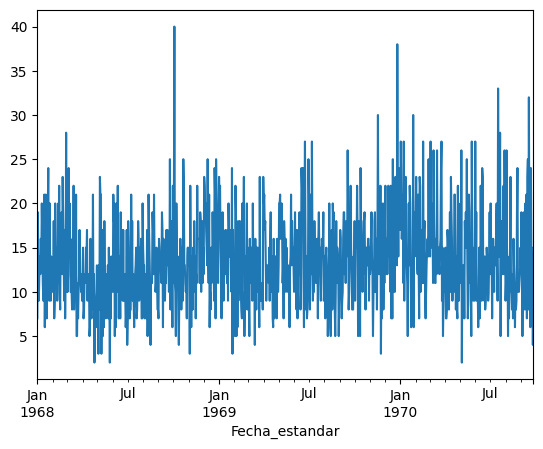

In [18]:
ingresos_diarios = df['Fecha_estandar'].value_counts().sort_index()
ingresos_diarios[0:1000].plot()

<Axes: xlabel='Fecha_estandar'>

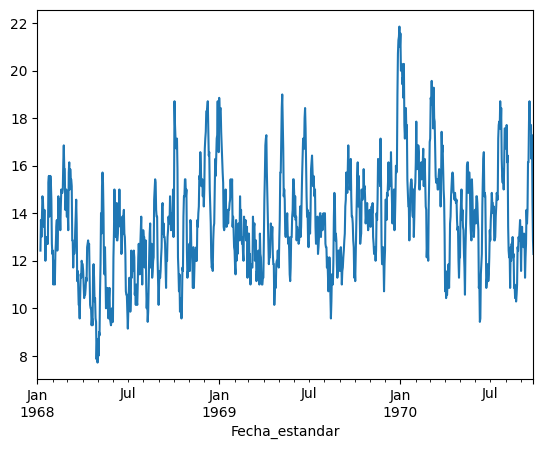

In [19]:
ingresos_diarios_suavizados = ingresos_diarios.rolling(7).mean()
ingresos_diarios_suavizados[0:1000].plot()

## 9.g Resumen

En esta lección hemos aprendido varios conceptos:
  
* El patrón División-Aplicación-Combinación (split-apply-combine) permite realizar análisis por subgrupos de forma eficiente y flexible.
    1. Dividir el conjunto de datos en grupos con `groupby()`
    2. Aplicar funciones como agregación, transformación o filtrado
    3. Combinar los resultados en un nuevo DataFrame
.

* La función agregar `.agg()` permite hacer cálculos resumiendo cada grupo en un parámetro
    * Se pueden usar funciones predefinidas con cadenas de texto, de `pandas`, otras bibliotecas o `lambda`
    * Varias funciones sobre todas las columnas usando una lista: `df.groupby(variables).agg([funcion1, funcion2, ...])`
    * Formato para múltiples columnas y funciones (recuerda que los nombres de columnas van sin comillas):
      ```
        .agg
            (
                result_col1=(target_col1, function1),
                result_col2=(target_col2, function2),
                result_col3=(target_col2, function2),
            )
        ```
    * Para cambiar los nombres de columnas `.rename(columns=dict())`
.

* Las funciones de transformación permiten modificar los datos dentro de un grupo sin cambiar su estructura general. Ejemplos: `.cumsum()`, `.diff()`, `.ffill()`, `.bfill()`.
* La función de filtrado `.filter()` permite quitar grupos usando una condición, generalmente expresada como función `lambda`.
* Las funciones de ventanas permiten calcular estadísticas móviles sobre una serie de datos. Ejemplos: `rolling(n)` y `expanding()`.
* Para combinar los resultados se puede usar funciones como `merge()` y `concat()`.

**¡Gracias!**